<a href="https://colab.research.google.com/github/Doidjin/Deep-Learning-With-Python/blob/main/Binary_classification_example_with_IMDB_Dataset_Finsh.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Binary classification example with IMDB Dataset

In [1]:
# num_words = 10000 -> palavras mais frequentes no training data

from keras.datasets import imdb

(train_data, train_labels), (test_data, test_labels) = imdb.load_data(num_words = 10000)

17473536/17464789 [==============================] - 0s 0us/step


In [2]:
# List of reviews

train_data[0]

[1,
 14,
 22,
 16,
 43,
 530,
 973,
 1622,
 1385,
 65,
 458,
 4468,
 66,
 3941,
 4,
 173,
 36,
 256,
 5,
 25,
 100,
 43,
 838,
 112,
 50,
 670,
 2,
 9,
 35,
 480,
 284,
 5,
 150,
 4,
 172,
 112,
 167,
 2,
 336,
 385,
 39,
 4,
 172,
 4536,
 1111,
 17,
 546,
 38,
 13,
 447,
 4,
 192,
 50,
 16,
 6,
 147,
 2025,
 19,
 14,
 22,
 4,
 1920,
 4613,
 469,
 4,
 22,
 71,
 87,
 12,
 16,
 43,
 530,
 38,
 76,
 15,
 13,
 1247,
 4,
 22,
 17,
 515,
 17,
 12,
 16,
 626,
 18,
 2,
 5,
 62,
 386,
 12,
 8,
 316,
 8,
 106,
 5,
 4,
 2223,
 5244,
 16,
 480,
 66,
 3785,
 33,
 4,
 130,
 12,
 16,
 38,
 619,
 5,
 25,
 124,
 51,
 36,
 135,
 48,
 25,
 1415,
 33,
 6,
 22,
 12,
 215,
 28,
 77,
 52,
 5,
 14,
 407,
 16,
 82,
 2,
 8,
 4,
 107,
 117,
 5952,
 15,
 256,
 4,
 2,
 7,
 3766,
 5,
 723,
 36,
 71,
 43,
 530,
 476,
 26,
 400,
 317,
 46,
 7,
 4,
 2,
 1029,
 13,
 104,
 88,
 4,
 381,
 15,
 297,
 98,
 32,
 2071,
 56,
 26,
 141,
 6,
 194,
 7486,
 18,
 4,
 226,
 22,
 21,
 134,
 476,
 26,
 480,
 5,
 144,
 30,
 5535,
 18,

In [3]:
# Lists of 0 and 1, 1-> positive; 0 -> negative

train_labels[0]

1

In [4]:
max([max(sequence) for sequence in train_data])

9999

In [5]:
word_index = imdb.get_word_index()
reverse_word_index = dict(
    [(value, key) for (key, value) in word_index.items()])
decode_review = ' '.join(
    [reverse_word_index.get(i - 3, '?') for i in train_data[0]]
)

1654784/1641221 [==============================] - 0s 0us/step


# Preparing the Data

In [6]:
# Encoding the integer sequence into binary matrix

import numpy as np

def vectorize_sequences(sequences, dimension=10000):
  results = np.zeros((len(sequences), dimension))
  for i, sequence in enumerate(sequences):
    results[i, sequence] = 1.
  return results

x_train = vectorize_sequences(train_data)   # Vectorize train data
x_test = vectorize_sequences(test_data)     # Vectorize test data

In [7]:
x_train[0]

array([0., 1., 1., ..., 0., 0., 0.])

In [8]:
# Vectorize the labels

y_train = np.asarray(train_labels).astype('float32')
y_test = np.asarray(train_labels).astype('float32')

# Building the Network

In [9]:
 # The model definition

 from keras import models
 from keras import layers

 model = models.Sequential()
 model.add(layers.Dense(16, activation='relu', input_shape=(10000,)))
 model.add(layers.Dense(16, activation='relu'))
 model.add(layers.Dense(1, activation='sigmoid'))

In [10]:
# Compiling the model

model.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['accuracy'])

In [11]:
# Configuring the optimizer

from tensorflow.keras import optimizers

model.compile(optimizer=optimizers.RMSprop(learning_rate=0.001),
loss='binary_crossentropy',
metrics=['accuracy'])

In [12]:
from tensorflow.keras import optimizers

model.compile(optimizer=optimizers.RMSprop(learning_rate=0.001),
loss='binary_crossentropy',
metrics=['accuracy'])

In [13]:
# Validating my data

x_val = x_train[:10000]
partial_x_train = x_train[10000:]

y_val = y_train[:10000]
partial_y_train = y_train[10000:]

In [14]:
# Training the Model

model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['acc'])

history = model.fit(partial_x_train, partial_y_train, epochs=20, batch_size=512, validation_data=(x_val, y_val))

Epoch 1/20
30/30 [==============================] - 2s 46ms/step - loss: 0.5048 - acc: 0.7877 - val_loss: 0.3904 - val_acc: 0.8596
Epoch 2/20
30/30 [==============================] - 1s 33ms/step - loss: 0.2985 - acc: 0.9034 - val_loss: 0.3136 - val_acc: 0.8796
Epoch 3/20
30/30 [==============================] - 1s 33ms/step - loss: 0.2157 - acc: 0.9298 - val_loss: 0.3571 - val_acc: 0.8502
Epoch 4/20
30/30 [==============================] - 1s 33ms/step - loss: 0.1725 - acc: 0.9443 - val_loss: 0.2808 - val_acc: 0.8885
Epoch 5/20
30/30 [==============================] - 1s 32ms/step - loss: 0.1394 - acc: 0.9555 - val_loss: 0.2835 - val_acc: 0.8873
Epoch 6/20
30/30 [==============================] - 1s 34ms/step - loss: 0.1177 - acc: 0.9620 - val_loss: 0.2973 - val_acc: 0.8849
Epoch 7/20
30/30 [==============================] - 1s 33ms/step - loss: 0.0956 - acc: 0.9722 - val_loss: 0.3105 - val_acc: 0.8821
Epoch 8/20
30/30 [==============================] - 1s 33ms/step - loss: 0.0805 - a

In [15]:
history_dict = history.history
history_dict.keys()

dict_keys(['loss', 'acc', 'val_loss', 'val_acc'])

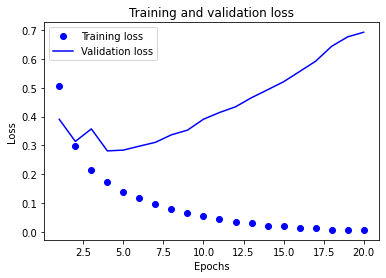

In [28]:
# Ploting the training and validation loss

import matplotlib.pyplot as plt
history_dict = history.history
loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']
acc = history.history['acc']
epochs = range(1, len(acc) + 1)
plt.plot(epochs, loss_values, 'bo', label='Training loss')
plt.plot(epochs, val_loss_values, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

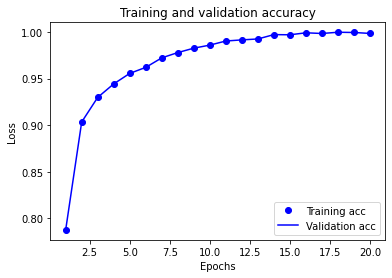

In [30]:
# Ploting the training and the validation accuracy

plt.clf()
acc_values = history_dict['acc']
val_acc_values = history_dict['val_acc']
val_acc = history.history['acc']
plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [31]:
# Retraining a model from scratch

model = models.Sequential()
model.add(layers.Dense(16, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))
model.compile(optimizer='rmsprop',loss='binary_crossentropy',metrics=['accuracy'])
model.fit(x_train, y_train, epochs=4, batch_size=512)
results = model.evaluate(x_test, y_test)

Epoch 1/4
49/49 [==============================] - 2s 26ms/step - loss: 0.4313 - accuracy: 0.8237
Epoch 2/4
49/49 [==============================] - 1s 26ms/step - loss: 0.2435 - accuracy: 0.9122
Epoch 3/4
49/49 [==============================] - 1s 26ms/step - loss: 0.1926 - accuracy: 0.9302
Epoch 4/4
782/782 [==============================] - 2s 2ms/step - loss: 1.9726 - accuracy: 0.4972


In [33]:
model.predict(x_test)

array([[0.5029153 ],
       [0.59452677],
       [0.5843303 ],
       ...,
       [0.5117968 ],
       [0.4949701 ],
       [0.57357574]], dtype=float32)